Text(0, 0.5, 'variances_squqared')

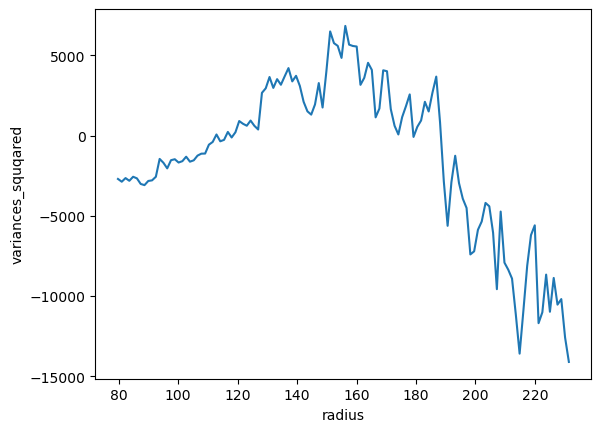

In [15]:
import calc
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(calc)
from calc import Hyperuniform_helper

file_name = 'positions.txt'
data = np.loadtxt(file_name)
rho, box_length, volume_fraction = data[0]
radius = np.linspace(box_length/5.8, box_length/2,120)
scaled_variances = np.zeros(len(radius))
helper = Hyperuniform_helper(radius[0], np.zeros(3), data[1:,], rho)
for i in range(len(radius)):
    helper.set_radius(radius[i])
    r, gr = helper.calculate_radial_distribution(40, 2)
    r_fit, g_fit = helper.g_fit(r, gr)
    k_values = np.sort(2*np.pi/r_fit[1:])
    sk = helper.hankel_transform_2d(gr, r, k_values)
    variance_square = helper.variance_calculations_in_reciprocal_space_2d(sk, k_values)
    scaled_variances[i] = variance_square

plt.plot(radius, scaled_variances)
plt.xlabel("radius")
plt.ylabel("variances_squqared")

In [16]:
print(scaled_variances)

[ -2703.30344097  -2876.30470968  -2650.11394391  -2818.07647256
  -2567.34357205  -2666.33670441  -3014.89740392  -3088.9315706
  -2829.71750747  -2791.5091022   -2567.54990358  -1456.40927148
  -1696.94940229  -2044.93651385  -1534.96811078  -1475.46505523
  -1680.48318634  -1595.74247617  -1317.55910274  -1628.26941405
  -1542.29620084  -1250.07530205  -1128.90117649  -1121.51793176
   -569.27076389   -398.85570752     66.71536604   -358.31480715
   -268.4470053     225.62395861   -119.35495378    204.33698497
    903.68375486    733.25843842    612.01104184    932.9410281
    606.78365862    376.87168471   2661.78651939   2943.85605862
   3647.44211275   2969.55253818   3514.50682709   3165.12348701
   3691.24958864   4202.49398015   3374.92047886   3721.75497823
   3091.50098227   2101.19633497   1509.34255997   1304.47574905
   1937.64952939   3268.86141268   1747.39322176   3993.21991192
   6488.29487252   5758.99308287   5587.78661285   4838.19368729
   6830.88830635   5665.382

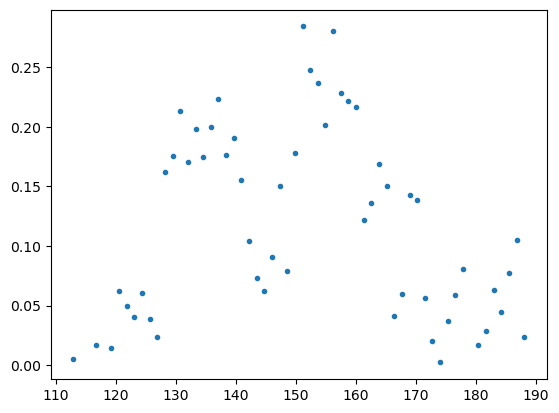

In [17]:
indexes= scaled_variances>0
variances_radius_ratio = (scaled_variances[indexes])/(radius[indexes])**2
plt.plot(radius[indexes], variances_radius_ratio, '.')